<a href="https://colab.research.google.com/github/OrlandoTics/Analitica-de-datos/blob/main/Predicci%C3%B3n_del_precio_de_las_acciones_de_Tesla_con_aprendizaje_autom%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("/content/TSLA.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-20,146.539993,153.113998,142.442001,149.272003,149.272003,73733000
1,2020-04-21,146.024002,150.666000,134.757996,137.343994,137.343994,101045500
2,2020-04-22,140.796005,146.800003,137.742004,146.421997,146.421997,70827500
3,2020-04-23,145.520004,146.800003,140.626007,141.126007,141.126007,66183500
4,2020-04-24,142.162003,146.145996,139.636002,145.029999,145.029999,66060000


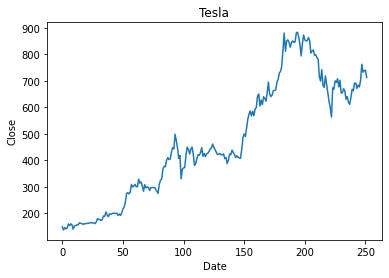

In [6]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()


In [8]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]


In [9]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [ ]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


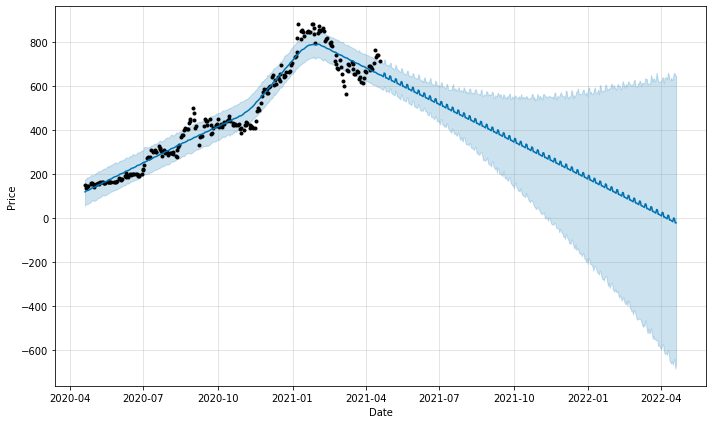

In [11]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")